<a href="https://colab.research.google.com/github/RoloCR87/INEINA/blob/main/An%C3%A1lisis_datos_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/RoloCR87/INEINA/main/Cuestionario_COVID.csv?token=GHSAT0AAAAAABVFQIUHL3XJK2JTNMERRQ2YYVDZSUA", sep = ",")

In [ ]:
datos

,Marca temporal,Acepto que mi hijo/hija participe en esta consulta,Sexo,Edad,Ceducativo,Neducativo,Provincia,1.\t¿Cuántas personas viven en tu casa incluyéndote a vos?,2.\t¿Dispone tu casa de algún espacio donde puedas jugar?,3.\t¿Cuáles han sido tus mayores preocupaciones durante la pandemia del COVID-19?,"4.\tEn el tiempo que has pasado en tu casa durante la pandemia del COVID-19, ¿qué sentimientos o emociones has sentido?. Menciona tres de ellos","5.\tDurante la pandemia, ¿en que momentos o situaciones te has sentido muy bien?","6.\tDurante esta pandemia, ¿en que momentos o situaciones te has sentido triste o desanimado?",7.\tMenciona tres actividades que has realizado durante esta pandemia y que te hayan hecho sentirte feliz.,"8.\t¿Qué otro tipo de actividades, además de las mencionadas anteriormente, has realizado durante este tiempo en casa?",9.\tSi pudieras pedir un deseo en este momento ¿cuál sería?
0,8/24/2020 14:16:14,Si,Niño,11.0,Público,Quinto,Alajuela,3,Sí,Las tareas,"Felicidad,enojos y estrés",Cuando son días libres,Cuando estoy cansado,"Andar en bicicleta ,jugar bola y tener tiempo ...","Jugar play ,comer y estar sano",Set-up gaming
1,8/24/2020 19:24:57,Si,Niña,11.0,Público,Quinto,Heredia,4,Sí,Que dure mucho tiempo más,"triste, aburrida y algunas veces feliz",Cuando vi a mis abuelitos después de mucho tie...,Cuando paso mucho tiempo sin ver o hablar con ...,"Mi cumpliañero, el cumpleaños de mi hermano y ...","Tareas, clases y juegos",Que termine la pandemia
2,8/24/2020 21:21:53,Si,Niña,12.0,Privado,Sexto,Alajuela,4,Sí,Clases virtuales,"Felicidad, diversión, enojo",Cuando voy afuera,Cuando mi mamá me regaña por no hacer los trab...,"Tye-dye , video llamadas y pintar",Pintar mi cuarto,Que mi mamá no me moleste todo el tiempo
3,8/26/2020 17:52:36,Si,Niña,12.0,Público,Sexto,Heredia,5,Sí,"Contagiarme ,no graduarme","Asustada, temor ,triste","Poder salir , hablar con mis compañeras",No poder regresar a la escuela,"Compartir con mis hermanos , ver películas,sal...","Ver tv , leer ,jugar play",Volver a la escuela y visitar a mis abuelos
4,8/26/2020 18:25:19,Si,Niña,10.0,Privado,Cuarto,San José,4,Sí,Que muchas personas mueran y que pase más de d...,"Felicidad, tristeza y aburrimiento.",Porque toda mi familia está sana y cuando volv...,Ver las noticias y que me perdí un viaje.,"Cocinar con mi mamá, poder estar en la casa pa...","Ver películas, series, jugar juegos de mesa, h...",Que encuentren la cura para el Covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,9/7/2020 18:55:49,Si,Niña,12.0,Público,NaN,Cartago,4,No,Contagiarse,"Estresada, aburrida, de mal humor.",Cuando puedo salir de paseo a lagún lugar.,En ningún momento,Ir a la playa nada mas,Nada solo tareas,Poder ir al cole
139,9/8/2020 21:05:56,Si,Niño,11.0,Público,Quinto,Cartago,3,Sí,"Que algún miembro de mi familia se contagie, e...","Preocupación, triste","Casi todos los días, cuando siembro",Cuando escucho que mueren personas.,"Jugar bola en mi patio, sembrar hortalizas, ba...","Entrenar, dibujar, pintar",Que todo esto acabe para poder volver a la esc...
140,9/14/2020 21:27:47,Si,Niño,11.0,Público,Quinto,San José,4,Sí,Que por falta del trabajo llegue él hambre,"Alegría, miedo, preocupación",Cuando juego,Cuando extraño mi escuela,"Jugar, comer y dormir",Estudiar y ayudar en los deberes de la casa,Que termine esta pandemia
141,9/15/2020 10:09:09,Si,Niña,12.0,Privado,Sexto,Guanacaste,4,Sí,No reunirme con mis compañeros cuanto salgo de...,"Aburrimiento, tristeza y ansiedad",Cuando salgo de mi casa,Cuando me mandan tareas,"Video llamadas, dibujar y ver peliculas",Pintar y jugar juegos con el celular,Que la cuarentena nunca hubiera existido


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 16 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Marca temporal                                                                                                                                   143 non-null    object 
 1   Acepto que mi hijo/hija participe en esta consulta                                                                                               142 non-null    object 
 2   Sexo                                                                                                                                             143 non-null    object 
 3   Edad                

In [ ]:
#Valores faltantes

In [ ]:
datos.isnull().sum()

Marca temporal                                                                                                                                      0
Acepto que mi hijo/hija participe en esta consulta                                                                                                  1
Sexo                                                                                                                                                0
Edad                                                                                                                                                2
Ceducativo                                                                                                                                          0
Neducativo                                                                                                                                          6
Provincia                                                                                           

In [ ]:
#Edad

In [ ]:
#Imputacion de datos

In [ ]:
median = datos["Edad"].median()

In [ ]:
datos["Edad"].fillna(median, inplace = True)

In [ ]:
datos["Edad"].isnull().sum()

0

In [ ]:
#Análisis exploratorio variable Edad

In [ ]:
datos["Edad"].mode()

0    10.0
dtype: float64

In [ ]:
datos["Edad"].mean()

10.636363636363637

In [ ]:
datos["Edad"].median()

11.0

In [ ]:
datos["Edad"].std()

1.2590263091449194

In [ ]:
datos["Edad"].var()

1.5851472471190784

In [ ]:
#Sexo

In [ ]:
datos['Sexo']=datos['Sexo'].replace({'Niño':1,'Niña':0})

In [ ]:
datos["Sexo"]

0      1
1      0
2      0
3      0
4      0
      ..
138    0
139    1
140    1
141    0
142    1
Name: Sexo, Length: 143, dtype: int64

In [ ]:
datos["Sexo"].mode()

0    0
dtype: int64

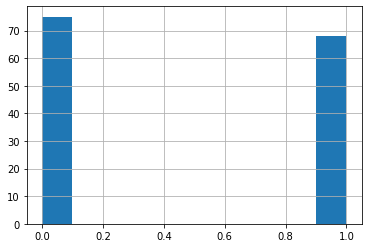

In [ ]:
datos["Sexo"].hist()
plt.show()

In [ ]:
#Centro educativo

In [ ]:
datos['Ceducativo']=datos['Ceducativo'].replace({'Público':1,'Privado':0})

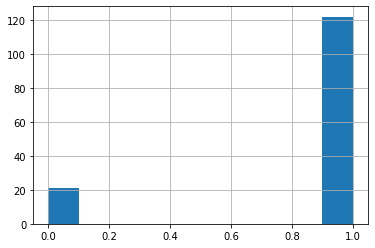

In [ ]:
datos["Ceducativo"].hist()
plt.show()

In [ ]:
#Provincia

In [ ]:
datos['Provincia']=datos['Provincia'].replace({'San José':1,'Alajuela':0, "Cartago": 3, "Heredia": 4, "Guanacaste": 5, "Puntarenas": 6, "Limón": 7})

In [ ]:
datos["Provincia"].mode()

0    5
dtype: int64

In [ ]:
#Tablas pivote

In [ ]:
datos.pivot_table('Ceducativo', index= 'Sexo', columns= 'Provincia', aggfunc= 'sum')

Provincia,0,1,3,4,5,6,7
Sexo,,,,,,,
0,7.0,8.0,3.0,3.0,22.0,1.0,17.0
1,5.0,12.0,1.0,4.0,17.0,NaN,22.0
